In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_style(style='darkgrid')

In [4]:
credit_card_df = pd.read_csv('creditcard.csv')

In [5]:
credit_card_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_card_df.shape

(284807, 31)

In [7]:
credit_card_df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [8]:
display(credit_card_df.info())
print('Number of null values:', credit_card_df.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

Number of null values: 0


In [9]:
credit_card_df[['Amount', 'Time']].describe()

,Amount,Time
count,284807.000000,284807.000000
mean,88.349619,94813.859575
std,250.120109,47488.145955
min,0.000000,0.000000
25%,5.600000,54201.500000
50%,22.000000,84692.000000
75%,77.165000,139320.500000
max,25691.160000,172792.000000


In [10]:
y = credit_card_df['Class']
X = credit_card_df.drop(y.name, axis=1)

In [11]:
y.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

[{<ufunc 'sqrt'>: 2.8222631528102635}, {<ufunc 'cbrt'>: 1.495629316102277}, {<ufunc 'log1p'>: 0.1627029277416401}]


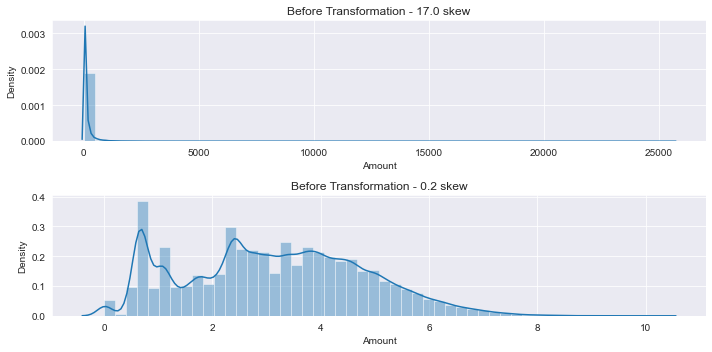

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[10, 5])
sns.distplot(X['Amount'], ax=ax1).set_title('Before Transformation - {:.1f} skew'.format(X['Amount'].skew()))

skews = []
for trans in [np.sqrt, np.cbrt, np.log1p]:
    skews.append({trans: X['Amount'].apply(trans).skew()})
print(skews)

X_trans = X.copy()
X_trans['Amount'] = X['Amount'].apply(np.log1p)
sns.distplot(X_trans['Amount'], ax=ax2).set_title('Before Transformation - {:.1f} skew'.format(X_trans['Amount'].skew()))
plt.tight_layout()
plt.show()

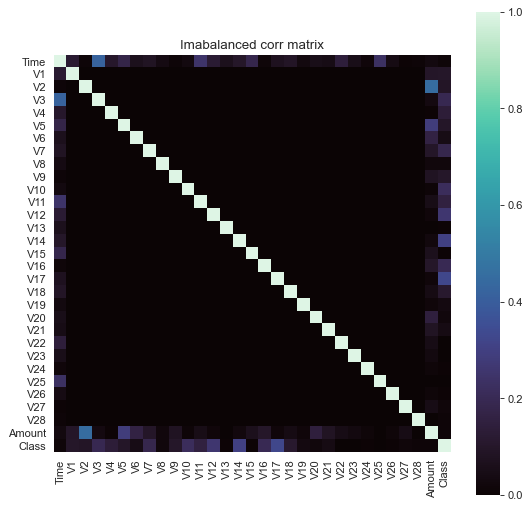

In [13]:
plt.figure(figsize=[8, 8], dpi=80)
sns.heatmap(pd.concat([X_trans, y], axis=1).corr().abs(), square=True, cmap='mako').set_title('Imabalanced corr matrix')
plt.show()

In [14]:
X_resample, y_resample = NearMiss(n_jobs=-1).fit_resample(X_trans, y)

In [15]:
print('New shape of the DataFrame:', X_resample.shape)
print('-'*20)
print('Distribution of a new target class:')
y_resample.value_counts()

New shape of the DataFrame: (984, 30)
--------------------
Distribution of a new target class:


0    492
1    492
Name: Class, dtype: int64

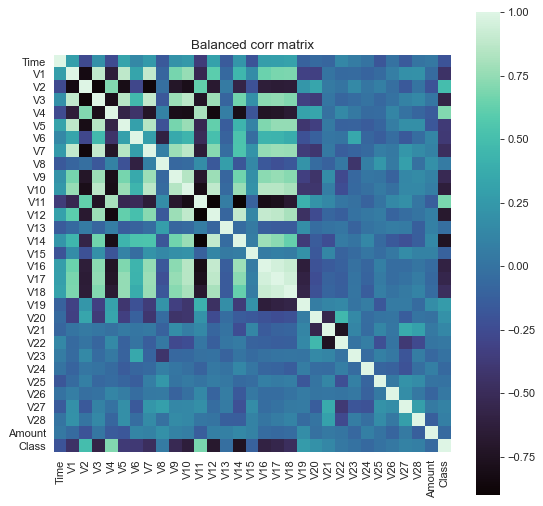

In [16]:
temp_df = pd.concat([X_resample, y_resample], axis=1)
plt.figure(figsize=[8, 8], dpi=80)
sns.heatmap(temp_df.corr(), square=True, cmap='mako').set_title('Balanced corr matrix')
plt.show()

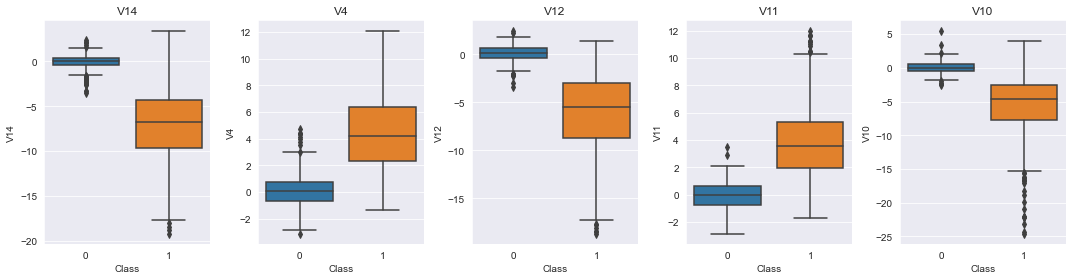

In [17]:
corr_columns = [
    temp_df.corr().abs()['Class'].sort_values(ascending=False).index[i] 
    for i in range(1, 6)]

fig, ax = plt.subplots(ncols=len(corr_columns), figsize=[15, 4])

[sns.boxplot(x='Class', y=column, data=temp_df, ax=ax).set_title(column) for column, ax in zip(corr_columns, ax)]
plt.tight_layout()
plt.show()

In [21]:
scaler = RobustScaler()
X_resample = scaler.fit_transform(X_resample)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_jobs=-1).fit_transform(X_resample)

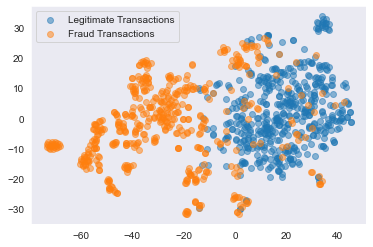

(<matplotlib.legend.Legend at 0x7f961456a190>, None)

In [66]:
tsne_df = pd.concat([pd.DataFrame(X_tsne), y_resample], axis=1)
legit = tsne_df[tsne_df['Class'] == 0]
plt.scatter(legit[0], legit[1], label='Legitimate Transactions', alpha=0.5)
fraud = tsne_df[tsne_df['Class'] == 1]
plt.scatter(fraud[0], fraud[1], label='Fraud Transactions', alpha=0.5)
plt.legend(), plt.show()

In [31]:
pickle.dump(model, open('models/randomforestmodel_SMOT.pickle', 'wb'))